In [ ]:
import os
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caminho para os dados no Google Drive
file_path_real = '/content/drive/MyDrive/audios_FOR/amostra_FOR/real'
file_path_fake = '/content/drive/MyDrive/audios_FOR/amostra_FOR/fake'

In [ ]:
# Função para extrair MFCCs de um arquivo
def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        return np.mean(mfccs.T, axis=0)  # Média dos coeficientes
    except Exception as e:
        print(f"Erro ao processar {file_path}: {e}")
        return None

# Carregar dados e rótulos
data = []
labels = []

In [ ]:
def load_data(folder_path, label):
    global data, labels
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        features = extract_features(file_path)
        if features is not None:
            data.append(features)
            labels.append(label)

# Criar as pastas 'real' e 'fake' caso não existam
if not os.path.exists(file_path_real):
    os.makedirs(file_path_real)
if not os.path.exists(file_path_fake):
    os.makedirs(file_path_fake)

# Processar dados
load_data(file_path_fake, 0)  # Rótulo 0 para Fake
load_data(file_path_real, 1)  # Rótulo 1 para Real

In [ ]:
# Remover dados faltantes
data_filtered = []
labels_filtered = []
for i in range(len(data)):
    if data[i] is not None:
        data_filtered.append(data[i])
        labels_filtered.append(labels[i])

data = data_filtered
labels = labels_filtered

In [ ]:
# Converter para DataFrame
df = pd.DataFrame(data)
df['label'] = labels

# Contar as ocorrências de cada label
label_counts = df['label'].value_counts()

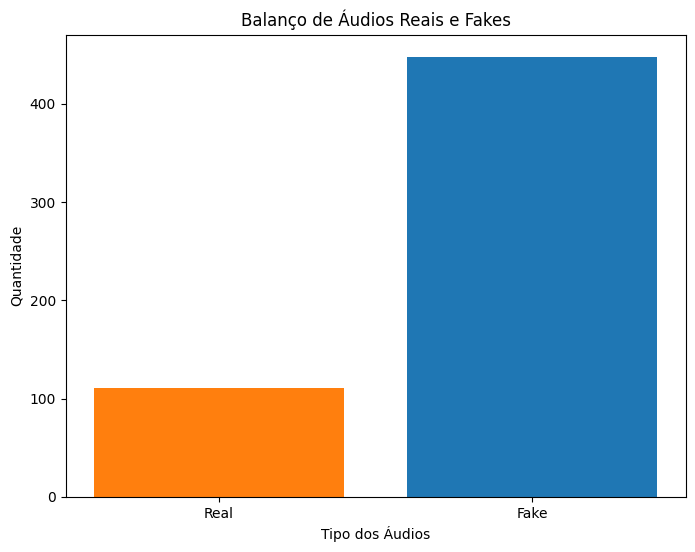

In [ ]:
# Plotando o gráfico
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values, tick_label=['Fake', 'Real'], color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Tipo dos Áudios')
plt.ylabel('Quantidade')
plt.title('Balanço de Áudios Reais e Fakes')
plt.show()

In [ ]:
df.shape

(559, 14)

In [ ]:
# Separar características (X) e rótulos (y)
X = df.drop(columns=['label'])
y = df['label']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelos
models = {
    "RandomForest": RandomForestClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
    "LGBM": LGBMClassifier(n_estimators=100, learning_rate=0.1, num_leaves=31, verbose=-1),
    "DecisionTree": DecisionTreeClassifier(criterion='gini', random_state=42)
}

# Treinar e avaliar modelos
for name, model in models.items():
    print(f"Treinando e avaliando {name}:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Acurácia: {accuracy:.2f}")
    print(f"Precisão: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("-" * 30)

Treinando e avaliando RandomForest:
Acurácia: 0.88
Precisão: 0.86
Recall: 1.00
F1-Score: 0.93
------------------------------
Treinando e avaliando KNeighbors:
Acurácia: 0.90
Precisão: 0.90
Recall: 0.98
F1-Score: 0.93
------------------------------
Treinando e avaliando XGBoost:
Acurácia: 0.88
Precisão: 0.88
Recall: 0.96
F1-Score: 0.92
------------------------------
Treinando e avaliando LGBM:
Acurácia: 0.92
Precisão: 0.92
Recall: 0.98
F1-Score: 0.95
------------------------------
Treinando e avaliando DecisionTree:
Acurácia: 0.88
Precisão: 0.87
Recall: 0.98
F1-Score: 0.92
------------------------------
